                                                              ASSIGNMENT NO:05

Name: Balasaheb Narayan Hinge

Class: BE Computer-A

Batch:C

Roll No.: 21CO047

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('diabetes.csv')

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.isna().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64

In [5]:
X=df.drop('Outcome',axis=1)
Y=df['Outcome']

In [ ]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [6]:
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

**K Neighbors Algorithm**

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.3,random_state=0)

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [10]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=3)

In [11]:
y_pred=knn.predict(xtest)

**Model Performance: Evaluation Metrices**

In [12]:
from sklearn.metrics import precision_score,confusion_matrix,accuracy_score,f1_score,recall_score,classification_report

In [13]:
cm=confusion_matrix(ytest,y_pred)
cm

array([[123,  34],
       [ 37,  37]], dtype=int64)

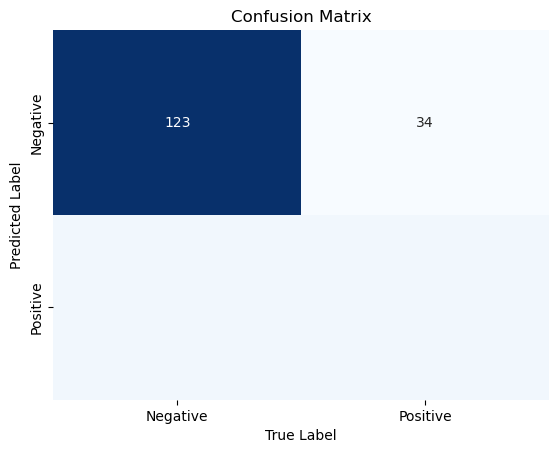

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.xticks(ticks=[1.5, 0.5], labels=['Positive', 'Negative'])  # Customize x-axis tick labels
plt.yticks(ticks=[1.5, 0.5], labels=['Positive','Negative'])  # Customize y-axis tick labels
plt.show()

**Accuracy**

In [15]:
acc=accuracy_score(ytest,y_pred)
print("Accuracy: ",acc)

Accuracy:  0.6926406926406926


**Error Rate**

In [16]:
err=1-acc
print("Error Rate: ",err)

Error Rate:  0.3073593073593074


**Precision Score**

In [17]:
pscore=precision_score(ytest,y_pred)
print("Precision Score: ",pscore)

Precision Score:  0.5211267605633803


**Recall Score**

In [18]:
rscore=recall_score(ytest,y_pred)
print("Recall Score: ",rscore)

Recall Score:  0.5


**F1 Score**

In [19]:
f1score=f1_score(ytest,y_pred)
print("F1 Score: ",f1score)

F1 Score:  0.5103448275862069


**Classification Report**

In [20]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.78      0.78       157
           1       0.52      0.50      0.51        74

    accuracy                           0.69       231
   macro avg       0.64      0.64      0.64       231
weighted avg       0.69      0.69      0.69       231

